/Users/yukaisun/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/yukaisun/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/yukaisun/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


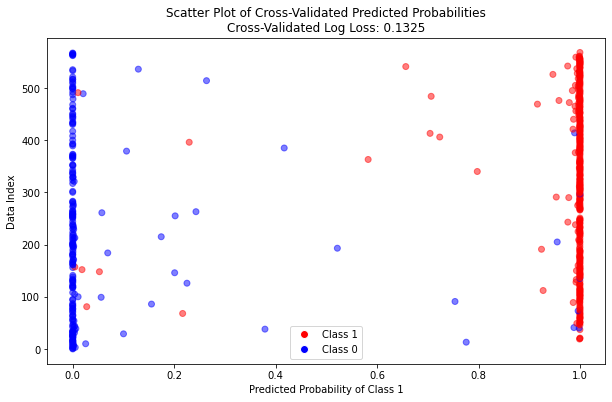

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import log_loss
from lightgbm import LGBMClassifier

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Initialize the LGBM model
model = LGBMClassifier()

# Perform cross-validation and get the predicted probabilities
y_pred = cross_val_predict(model, X, y, cv=5, method='predict_proba')

# Get the predicted probabilities for the positive class (class 1)
y_pred_class1 = y_pred[:, 1]

# Create the index array for the data points
indices = np.arange(len(y))

# Assign colors to different labels
colors = ['red' if label == 1 else 'blue' for label in y]

# Calculate cross-validated log loss
loss = -np.mean(cross_val_score(model, X, y, cv=5, scoring='neg_log_loss'))

# Plot the scatter plot of predicted probabilities vs. data index with different colors
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_class1, indices, color=colors, alpha=0.5)
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Data Index')

# Create custom legend handles for the scatter plot
class1_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8)
class0_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8)
plt.legend([class1_patch, class0_patch], ['Class 1', 'Class 0'])

# Add cross-validated log loss to the title
plt.title(f'Scatter Plot of Cross-Validated Predicted Probabilities\nCross-Validated Log Loss: {loss:.4f}')
plt.show()

In [2]:
y_pred

array([[9.99747335e-01, 2.52665178e-04],
       [9.99928254e-01, 7.17457853e-05],
       [9.99973397e-01, 2.66025341e-05],
       ...,
       [9.99895797e-01, 1.04202853e-04],
       [9.99958769e-01, 4.12307085e-05],
       [3.79188217e-05, 9.99962081e-01]])

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import lightgbm as lgb

# Load the Boston dataset
housing = fetch_california_housing()
#df = pd.read_csv('', sep=',')
df = pd.DataFrame(data=housing['data'], columns=housing['feature_names'])
df['target'] = housing['target']

X, y = df.drop(['target'], axis=1), df[['target']]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LightGBM regressor
lgb_model = lgb.LGBMRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Define the KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform the GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Iterate over the folds and calculate the loss for each fold
fold_losses = []
for train_index, val_index in kfold.split(X_train, y_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
    y_fold_train, y_fold_val = y_train.iloc[train_index, :], y_train.iloc[val_index, :]
    
    best_model.fit(X_fold_train, y_fold_train)
    y_val_pred = best_model.predict(X_fold_val)
    fold_loss = mean_squared_error(y_fold_val, y_val_pred)
    fold_losses.append(fold_loss)

# Print the loss for each fold
for fold, loss in enumerate(fold_losses):
    print(f"Fold {fold+1} Loss: {loss}")

# Print the best parameters, best score, and mean loss across folds
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Mean Loss across Folds:", np.mean(fold_losses))

Fold 1 Loss: 0.2293861053731641
Fold 2 Loss: 0.20960571134544026
Fold 3 Loss: 0.2053813230762813
Fold 4 Loss: 0.2220594079558242
Fold 5 Loss: 0.20087269256088575
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best Score: -0.21346104806231914
Mean Loss across Folds: 0.21346104806231914


In [3]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the best parameters, best score, and mean squared error
print("Mean Squared Error:", mse)

Mean Squared Error: 0.21537825655583825


In [10]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the breast cancer dataset
breast = load_breast_cancer()
df = pd.DataFrame(data=breast['data'], columns = breast['feature_names'])
df['target'] = data.target

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
num_cols = df.select_dtypes(include=['float64']).columns.tolist()

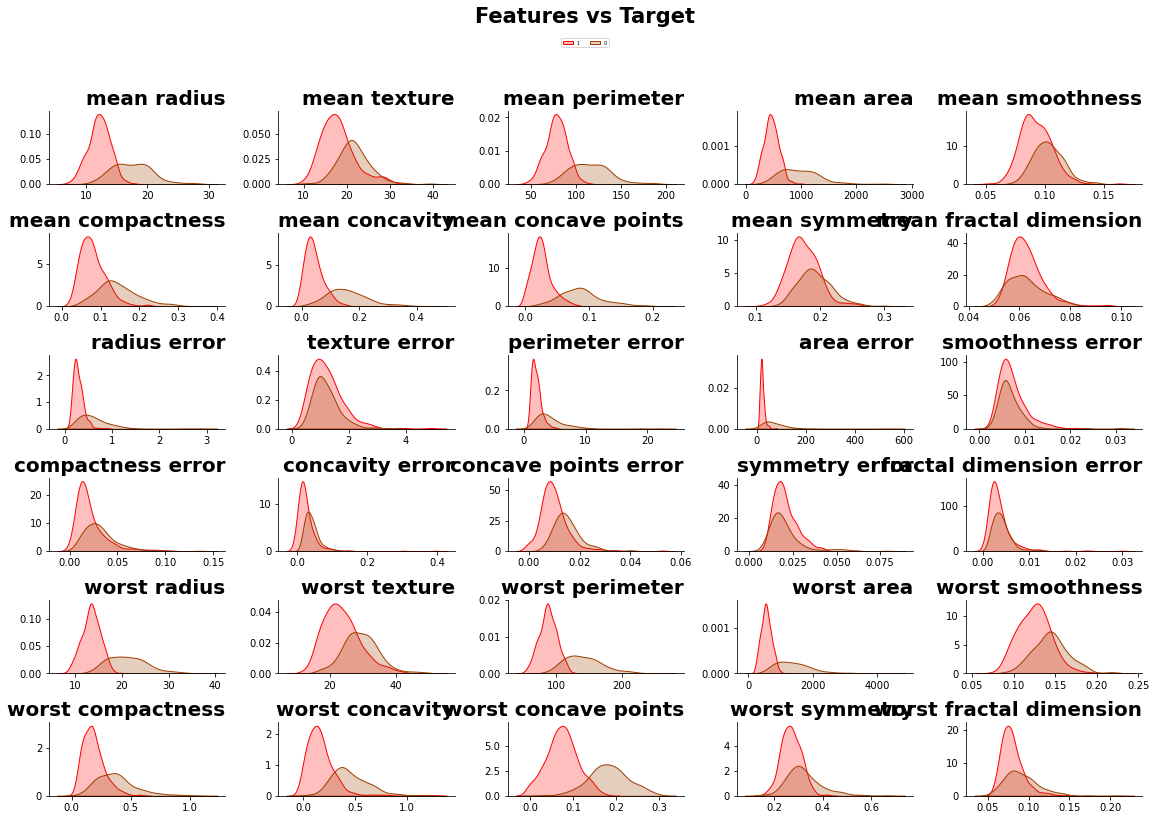

In [20]:
import seaborn as sns

figsize = (4*4, 20)
fig = plt.figure(figsize=figsize)
for idx, col in enumerate(num_cols):
    ax = plt.subplot(11,5, idx + 1)
    sns.kdeplot(
        data=df, hue='target', fill=True,
        x=col, palette=['#9E3F00', 'red'], legend=False
    )
            
    ax.set_ylabel(''); ax.spines['top'].set_visible(False), 
    ax.set_xlabel(''); ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right', 
                 weight='bold', fontsize=20)

fig.suptitle(f'Features vs Target\n\n\n', ha='center',  fontweight='bold', fontsize=21)
fig.legend([1, 0], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=5, ncol=3)
plt.tight_layout()
plt.show()

In [5]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold, RepeatedMultilabelStratifiedKFold

In [6]:
%history

!pip install iterative-stratification
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
MultilabelStratifiedKFold -h
help(MultilabelStratifiedKFold)
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold, RepeatedMultilabelStratifiedKFold
%history
